## Bank note authentication project
Source:https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Owner of database: Volker Lohweg 
Date received: August, 2012


Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

In [1]:
#!pip install pyforest

In [3]:
from pyforest import *

In [4]:
lazy_imports()

['from sklearn.model_selection import cross_val_score',
 'import dash',
 'from sklearn.cluster import KMeans',
 'import imutils',
 'import nltk',
 'from dask import dataframe as dd',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.linear_model import ElasticNetCV',
 'import bokeh',
 'import pandas as pd',
 'from PIL import Image',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import pydot',
 'import fastai',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import spacy',
 'import plotly.express as px',
 'from sklearn.decomposition import PCA',
 'import tqdm',
 'import re',
 'import datetime as dt',
 'import sklearn',
 'import statsmodels.api as sm',
 'from sklearn.ensemble import RandomForestRegressor',
 'import sys',
 'impo

In [1]:
data = pd.read_csv('data_banknote_authentication.csv', header=None)
data.head()

<IPython.core.display.Javascript object>

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Next we are going to add the column names from the attribute list of the dataset
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

In [2]:
column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

data.columns = column_names
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [13]:
print(data.info())
print('*'*20)
print(data['class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None
********************
0    762
1    610
Name: class, dtype: int64


We see that the data has no null values and data type is number format, as it should be. 
Also, we have 762 zeros and 610 ones. This shows that this dataset is not imbalanced. 

### Visulalization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

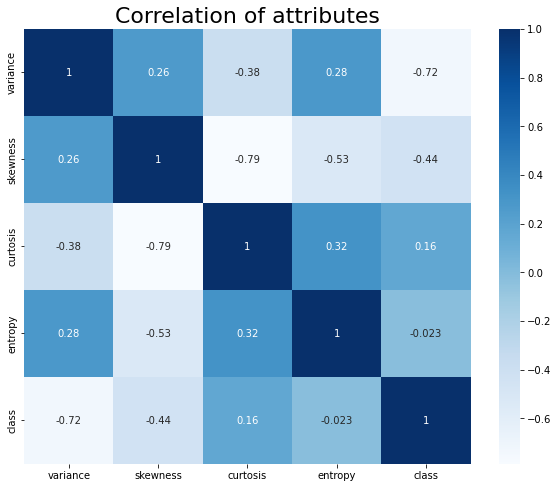

In [17]:
# let us check if we can find some info from the correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), vmax=1, annot=True, cmap='Blues') 
plt.title('Correlation of attributes', fontsize = 22)
plt.show()

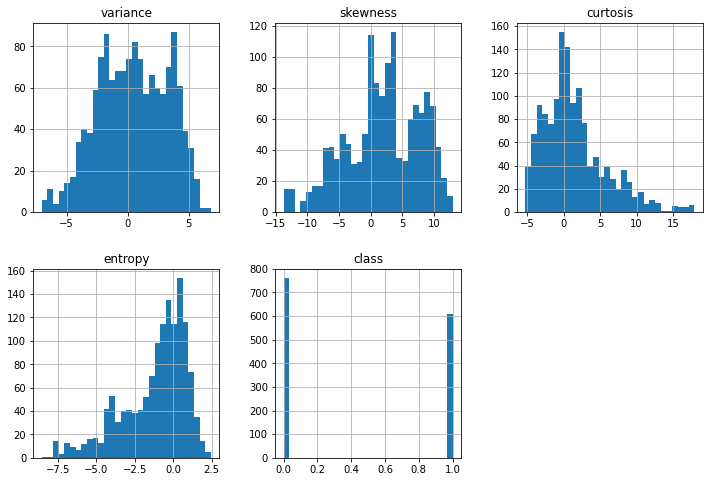

In [26]:
# Let us plot some histograms to see the data spread. It is always a good idea to see how are the attributes distributed. It helps in normalization of data later during modeling.

data.hist(bins=30, figsize=(12,8), layout=(2, 3));